In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

import spectra_cluster.clustering_parser as clustering_parser
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus

from ms_io import ms_io

### Function to parse the clusters contained in a file

In [10]:
def extract_clusters_stats(file):
    parser = clustering_parser.ClusteringParser(file)

    totalSp = 0
    totalClusteredSp = 0
    nClusters = 0 # incremented only if the cluster contains at least 2 spectra
    clusters = {}

    for cluster in parser:
        totalSp = totalSp + cluster.n_spectra
        if cluster.n_spectra >= 2:
            nClusters = nClusters + 1
            totalClusteredSp = totalClusteredSp + cluster.n_spectra
            clusters[cluster.id] = []

            for sp in cluster._spectra:
                _, _, id_verb, _ = sp.title.split('#')
                _, _, id = id_verb.split('=')
                id = int(id) - 1
                clusters[cluster.id].append( (clustering_file, id) )

    avSize = np.mean([len(l) for l in clusters.values()])

    return totalSp, totalClusteredSp, nClusters, avSize, clusters

### Plot the proportion of clustered spectra

### Show the stats + plot some clusters

In [11]:
dir_clustering = "prideClusters/F01"
clustering_file = os.path.join(dir_clustering, "0-80_noFiltering.clustering")

totalSp, totalClusteredSp, nClusters, avSize, clusters = extract_clusters_stats(clustering_file)

propClusteredSp = totalClusteredSp/totalSp*100
print("Total number of spectra:", totalSp)
print("Total clustered spectra:", totalClusteredSp)
print("Proportion of clustered spectra: {0:.2f}%".format(propClusteredSp))
print("Number of clusters:", nClusters)
print("Average size: {0:.2f}".format(avSize))
print("{0:d} | {1:.2f}% | {2:d} | {3:.2f} |".format(
    totalClusteredSp, propClusteredSp, nClusters, avSize
))

Total number of spectra: 39266
Total clustered spectra: 18461
Proportion of clustered spectra: 47.02%
Number of clusters: 7209
Average size: 2.56
18461 | 47.02% | 7209 | 2.56 |


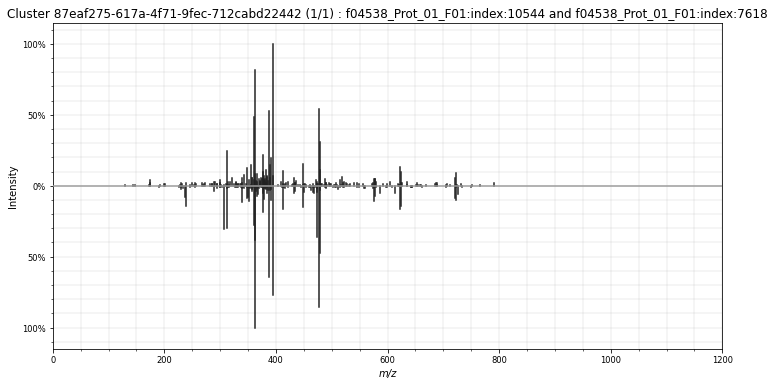

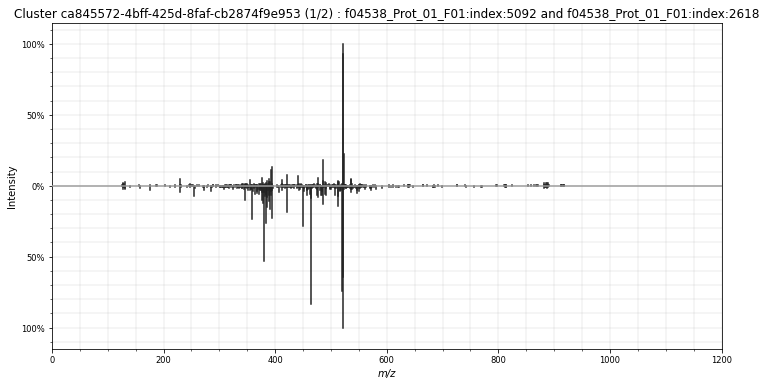

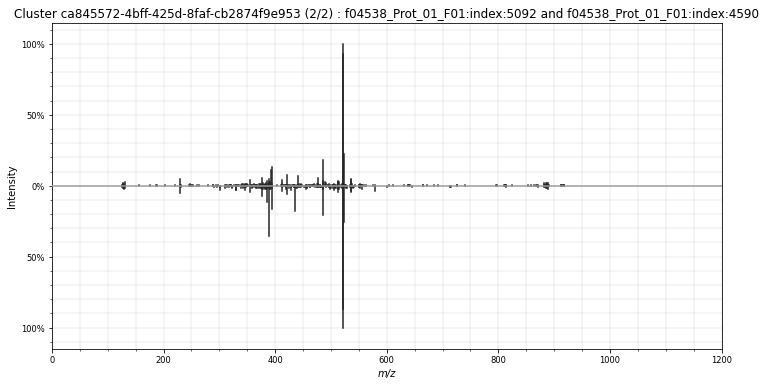

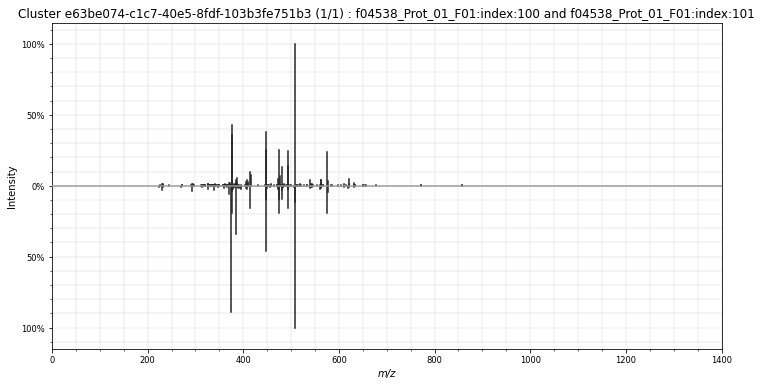

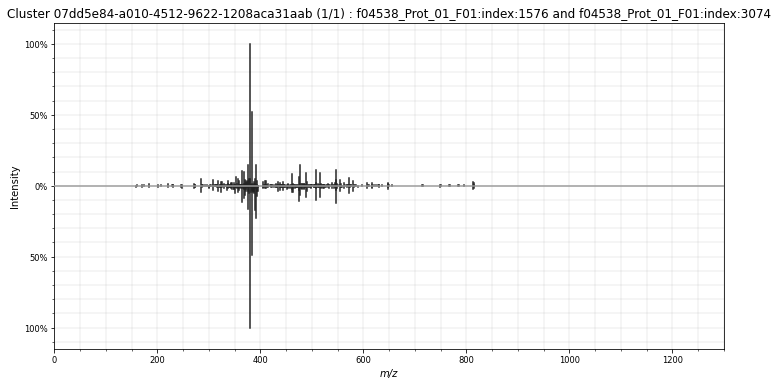

In [12]:
dir_mgf = "../datasets/CCLE_F01"
mgf_file = os.path.join(dir_mgf, "f04538_Prot_01_F01.mgf")

counter = 0
for id_cl, cl in clusters.items():
    sps = []
    for (filename, scanid) in cl:
        sp = ms_io.get_one_spectrum(mgf_file, scanid)
        sps.append(sp)

    for j in range(1, len(sps)):
        fig, ax = plt.subplots(figsize=(12, 6))
        spectrum_top, spectrum_bottom = sps[0], sps[j]
        ax.set_title("Cluster {} ({}/{}) : {} and {}".format(
            id_cl, j, len(sps)-1,
            spectrum_top.identifier,
            spectrum_bottom.identifier
        ))
        sup.mirror(spectrum_top, spectrum_bottom, ax=ax)
        plt.show()
        plt.close()

    counter = counter + 1
    if counter > 3:
        break
